In [1]:
import matplotlib 
import matplotlib.pyplot as plt 

import numpy as np 
import pandas as pd

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 

from collections import defaultdict
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns 
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

# Упражнение 1

In [14]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)


def plot_horizontal_bar(barl, lab, ytickl, fs):
    plt.figure(figsize=fs)
    plt.xticks(np.arange(-10, 10, 2.5))
    plt.yticks(np.arange(10), ytickl)
    plt.grid(True)
    ax = plt.gca()
    for i in range(10):
        ax.barh(i, color='#128eb0', alpha=0.5, height=0.8, width=barl[i], label=lab[i])
        if barl[i] < 0:
            ax.annotate(lab[i], xy=(0,i), xytext=(0,i), size=15)
        else:
            ax.annotate(lab[i], xy=(0,i), xytext=(barl[i],i), size=15)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    plt.show()

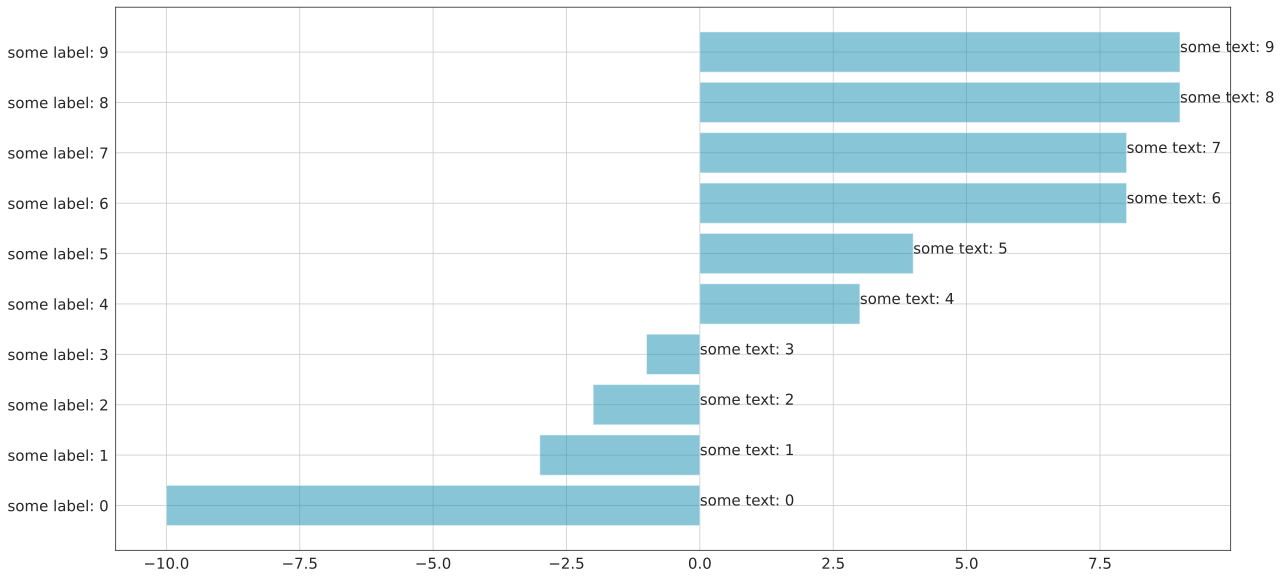

In [15]:
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

# Упражнение 2


In [3]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
colors = ['#ff0000', '#0000ff', '#1900e6','#3300cc', '#4d00b2','#73008c','#800080', '#a60059',  '#bf0040','#e6001a']


def plot_time_probabilities(pit, fs):
    plt.figure(figsize=fs)
    plt.plot(pit[0], label=f'Probability: {0}', color='#003399')
    plt.fill_between(pit.index, pit[0], color='#003399') 
    for i in range(1, 10):
        pit[i] += pit[i-1]
        plt.plot(pit[i], label=f'Probability: {i}', color=colors[i])
        plt.fill_between(pit.index, pit[i-1], pit[i], color=colors[i])
    plt.legend(prop={'size': 16}, loc='lower left')
    plt.grid(True)
    plt.show()

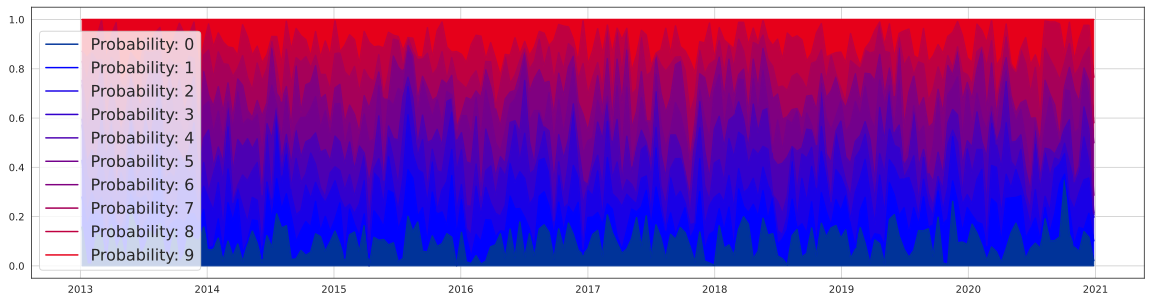

In [4]:
plot_time_probabilities(probabilities_in_time, figsize)

# Упражнение 3

In [90]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


def plot_intraday_ts(its, fs):
    fig, ax = plt.subplots(1, 1, figsize=fs)
    table = defaultdict(dict)

    for i, value in its.items():
        table[i.date()][i.time()] = value
    

    x = list(table.keys())
    y = list(table[x[0]].keys())
    z = []

    for _, hours in table.items():
        z.append([])
        for _, value in hours.items():
            z[-1].append(value)
        while len(z[-1]) < 24:
            z[-1].append(np.nan)

    z = np.array(z).T
    x = [datetime.combine(x_, datetime.min.time()) for x_ in x][:z.shape[1]]
    y = [datetime.combine(datetime.min.date(), y_) for y_ in y]
    
    plt.pcolor(mdates.date2num(x), mdates.date2num(y), z, shading='auto', cmap='RdBu')  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    
    plt.xticks(x[1::2])
    plt.yticks(y[1::2])
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(8) 
        
    fig.autofmt_xdate()
    
    axins = ax.inset_axes([-0.07, 0, 0.02, 1])
    plt.colorbar(cax=axins)
    
    fig.text(0.11, 0.5, "Время", rotation=90, fontsize=25)
    
    plt.show()

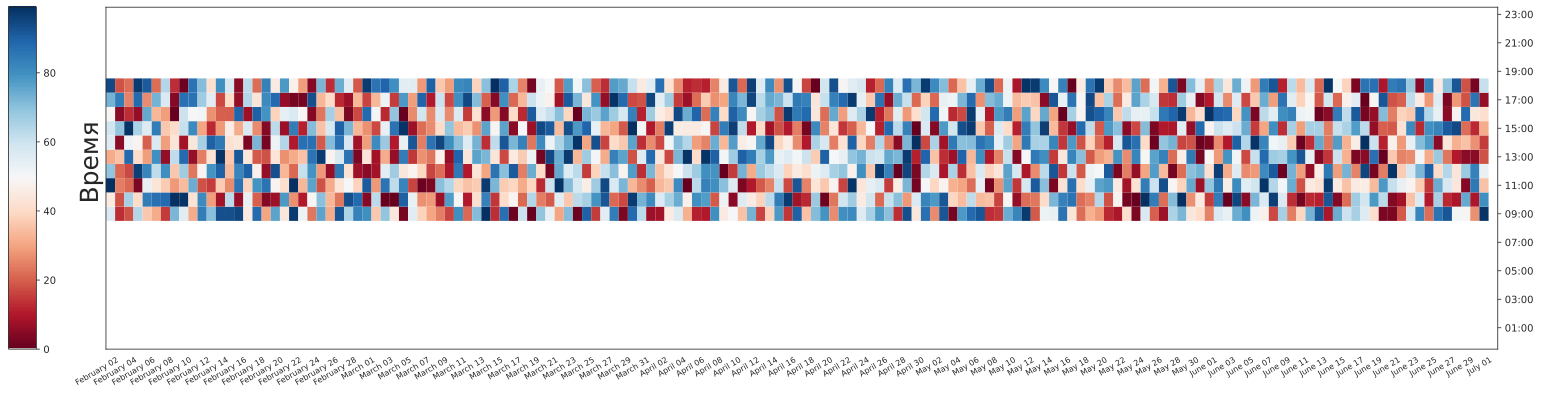

In [91]:
plot_intraday_ts(intraday_ts, figsize)